In [43]:
from pathlib import Path
import shutil as sh
import json
import pandas as pd
import numpy as np

models_path = Path('../run_hist/2-15_shuffle/models')
stats_path = Path('./stats')

if not stats_path.exists():
    stats_path.mkdir()
elif not stats_path.empty_dir():
    print("Stats directory not empty")
    exit(1)


for model in models_path.iterdir():
    if not model.is_dir():
        continue
    sh.copy(str(model / 'stats.json') , str(stats_path / f'{model.stem}.json') )
    
stats_files = list(stats_path.iterdir())

In [44]:
stats_df = pd.DataFrame()
for stat_f in stats_files:
    print("========= " + stat_f.stem + " ==========")
    
    with open(stat_f, 'r') as f:
        stats = json.load(f)
        
        for k, run in stats.items():
            print(f'--- {k}: {len(run)} ---') 
            
            print(k, run)
            
            loss = 0
            cluster_sizes = []
            for cluster in run:
                loss += cluster['loss']*cluster['cluster_size']
                cluster_sizes.append(cluster['cluster_size'])
            loss /= sum(cluster_sizes) 
            
            stats_df = pd.concat([stats_df, pd.DataFrame([
                    {'model': stat_f.stem, 
                    'run': k, 
                    'cluster sizes':cluster_sizes, 
                    'nclusters': len(run),
                    'avg loss': loss,
                    'min loss' : min([c['loss'] for c in run]),
                    'max loss': max([c['loss'] for c in run]),
                    'std loss': np.std([c['loss'] for c in run]),}
                ])
            ])
                
            print("Average Cluster Loss: ", loss)
stats_df.reset_index(drop=True, inplace=True)
stats_df[['run', 'nclusters']] = stats_df[['run', 'nclusters']].astype(int)
        
    

========= minisom_alpha ==========
--- 0: 4 ---
0 [{'run': 0, 'cluster': 4, 'loss': 0.07717248797416687, 'mse': 0.07717248797416687, 'cluster_size': 1723}, {'run': 0, 'cluster': 3, 'loss': 0.07843030244112015, 'mse': 0.07843030244112015, 'cluster_size': 2868}, {'run': 0, 'cluster': 1, 'loss': 0.07971988618373871, 'mse': 0.07971988618373871, 'cluster_size': 4563}, {'run': 0, 'cluster': 2, 'loss': 0.07799237221479416, 'mse': 0.07799237221479416, 'cluster_size': 2617}]
Average Cluster Loss:  0.07864872847873063
========= pca_agg_alpha ==========
--- 0: 2 ---
0 [{'run': 0, 'cluster': 0, 'loss': 0.07889369875192642, 'mse': 0.07889369875192642, 'cluster_size': 7208}, {'run': 0, 'cluster': 1, 'loss': 0.07933551073074341, 'mse': 0.07933551073074341, 'cluster_size': 4563}]
Average Cluster Loss:  0.07906496610893449
--- 1: 3 ---
1 [{'run': 1, 'cluster': 0, 'loss': 0.08010415732860565, 'mse': 0.08010415732860565, 'cluster_size': 4563}, {'run': 1, 'cluster': 1, 'loss': 0.08159130066633224, 'mse': 

# Model Results

In [45]:
stats_df

,model,run,cluster sizes,nclusters,avg loss,min loss,max loss,std loss
0,minisom_alpha,0,"[1723, 2868, 4563, 2617]",4,0.078649,0.077172,0.079720,0.000921
1,pca_agg_alpha,0,"[7208, 4563]",2,0.079065,0.078894,0.079336,0.000221
2,pca_agg_alpha,1,"[4563, 4890, 2318]",3,0.080911,0.080104,0.081591,0.000616
3,pca_agg_alpha,2,"[4890, 3072, 2318, 1491]",4,0.078292,0.071536,0.080072,0.003417
4,pca_agg_alpha,3,"[2318, 3072, 3175, 1491, 1715]",5,0.079596,0.066892,0.082741,0.005974
5,pca_agg_alpha,4,"[3072, 1261, 3175, 1491, 1715, 1057]",6,0.080953,0.071503,0.085104,0.004525
6,pca_agg_alpha,5,"[3175, 1261, 1009, 1491, 1715, 1057, 2063]",7,0.077822,0.056133,0.084930,0.009189
7,maxabs_pca_agg,0,"[7208, 4563]",2,0.079416,0.079089,0.079931,0.000421
8,maxabs_pca_agg,1,"[4563, 3644, 3564]",3,0.077306,0.074524,0.080031,0.002249
9,maxabs_pca_agg,2,"[2365, 3644, 3564, 2198]",4,0.074152,0.066018,0.078402,0.004543


## Top 10

In [46]:
top10 = list(stats_df['avg loss'].nsmallest(10).index)
stats_df.loc[top10]

,model,run,cluster sizes,nclusters,avg loss,min loss,max loss,std loss
23,minisom_mag,0,"[5895, 1594, 3206, 1076]",4,0.063300,0.042008,0.077879,0.012817
29,maxabs_pca_kmeans,5,"[1643, 1252, 1199, 2187, 1736, 1696, 2058]",7,0.072742,0.066080,0.080332,0.004485
17,minmax_pca_kmeans,5,"[1643, 1252, 1199, 2187, 1736, 1696, 2058]",7,0.073150,0.068643,0.077366,0.003181
10,maxabs_pca_agg,3,"[3644, 2198, 3564, 1141, 1224]",5,0.073459,0.062420,0.078933,0.005710
28,maxabs_pca_kmeans,4,"[1648, 2932, 1200, 2414, 1737, 1840]",6,0.073712,0.066513,0.081639,0.005558
15,minmax_pca_kmeans,3,"[1576, 3063, 1407, 3734, 1991]",5,0.073796,0.041039,0.083515,0.015525
27,maxabs_pca_kmeans,3,"[1576, 3063, 1407, 3734, 1991]",5,0.074107,0.050039,0.083092,0.011881
9,maxabs_pca_agg,2,"[2365, 3644, 3564, 2198]",4,0.074152,0.066018,0.078402,0.004543
14,minmax_pca_kmeans,2,"[2525, 3325, 2057, 3864]",4,0.074635,0.065501,0.079333,0.005873
16,minmax_pca_kmeans,4,"[1648, 2931, 1200, 2416, 1737, 1839]",6,0.074643,0.065299,0.082337,0.006276


# Prediction Plots

In [53]:
import pickle as pkl
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump

from typing import Dict, List, Tuple
from sklearn.preprocessing import QuantileTransformer


clusters_path = Path('../run_hist/2-15_shuffle/clusters')
data_path = Path('../../data/compiled/')

## Helper Functions

In [55]:
def plot_cluster_preds(pred_df : pd.DataFrame, model_name : str):
    """Plot the predictions of a cluster."""
    ns = pred_df.iloc[:, 0:640]
    vs = pred_df.iloc[:, 640:1280]
    ts = pred_df.iloc[:, 1280:1920]
    
    vs.reset_index(drop=True, inplace=True)
    ts.reset_index(drop=True, inplace=True)
    
    fig, axs = plt.subplots(3, 1, figsize=(12, 6))
    fig.suptitle(f'Predictions for {model_name}')
    
    for _, row in ns.iterrows():
        sns.lineplot(row.values, ax=axs[0], label=None, linewidth=0.1)
        
    for _, row in vs.iterrows():
        sns.lineplot(row.values, ax=axs[1], label=None, linewidth=0.1)

    for _, row in ts.iterrows():
        sns.lineplot(row.values, ax=axs[2], label=None, linewidth=0.1)
    
    plt.show()    
    
    
def load_original_data(data_path: Path, save_scalers : bool = False) -> Tuple[pd.DataFrame, pd.DataFrame, QuantileTransformer, QuantileTransformer]:
    """Load the original data from the file."""

    inputs = pd.read_csv(data_path / 'inputsdata_compilation.csv')
    outputs = pd.read_csv(data_path / 'outputsdata_compilation.csv')
    
    input_filenames = inputs[['filename']]
    output_filenames = outputs[['filename']]
    
    scaler_inputs, scaler_ouputs = QuantileTransformer(), QuantileTransformer()
    inputs = scaler_inputs.fit_transform(inputs.iloc[:, 1:])
    outputs = scaler_ouputs.fit_transform(outputs.iloc[:, 1:])
    
    if save_scalers:
        dump((scaler_inputs, scaler_ouputs), open(data_path / 'scalers.pkl', 'wb'))
    
    inputs = pd.DataFrame(inputs)
    inputs = pd.concat([input_filenames, inputs], axis=1)
    
    outputs = pd.DataFrame(outputs)
    outputs = pd.concat([output_filenames, outputs], axis=1)
    
    # print("Scaled inputs:", inputs.head())
    # print("Scaled outputs:", outputs.head())
    return inputs, outputs, scaler_inputs, scaler_ouputs


def join_files_in_cluster(cluster_files: List[Path], input_data : pd.DataFrame, output_data : pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Join all files in a cluster into a single dataframe."""
    cluster_inputs, cluster_outputs = pd.DataFrame(), pd.DataFrame()
    
    inputs = [input_data.loc[input_data['filename'] == f].iloc[:, 1:]
              for f in cluster_files]
    
    cluster_inputs = pd.concat(inputs, axis=0, ignore_index=True)
    
    outputs = [output_data.loc[output_data['filename'] == f].iloc[:, 1:]
               for f in cluster_files]
    cluster_outputs = pd.concat(outputs, axis=0, ignore_index=True)      
    
    # print(cluster_inputs.head())
    # print(cluster_inputs.shape)
    # print(cluster_df)
    # print(cluster_df.shape)
    # print(cluster_df.columns)
    # print("Cluster shape:", cluster_inputs.shape)
    return cluster_inputs, cluster_outputs

## Plot Predictions

In [49]:
stats_df.loc[top10]

,model,run,cluster sizes,nclusters,avg loss,min loss,max loss,std loss
23,minisom_mag,0,"[5895, 1594, 3206, 1076]",4,0.063300,0.042008,0.077879,0.012817
29,maxabs_pca_kmeans,5,"[1643, 1252, 1199, 2187, 1736, 1696, 2058]",7,0.072742,0.066080,0.080332,0.004485
17,minmax_pca_kmeans,5,"[1643, 1252, 1199, 2187, 1736, 1696, 2058]",7,0.073150,0.068643,0.077366,0.003181
10,maxabs_pca_agg,3,"[3644, 2198, 3564, 1141, 1224]",5,0.073459,0.062420,0.078933,0.005710
28,maxabs_pca_kmeans,4,"[1648, 2932, 1200, 2414, 1737, 1840]",6,0.073712,0.066513,0.081639,0.005558
15,minmax_pca_kmeans,3,"[1576, 3063, 1407, 3734, 1991]",5,0.073796,0.041039,0.083515,0.015525
27,maxabs_pca_kmeans,3,"[1576, 3063, 1407, 3734, 1991]",5,0.074107,0.050039,0.083092,0.011881
9,maxabs_pca_agg,2,"[2365, 3644, 3564, 2198]",4,0.074152,0.066018,0.078402,0.004543
14,minmax_pca_kmeans,2,"[2525, 3325, 2057, 3864]",4,0.074635,0.065501,0.079333,0.005873
16,minmax_pca_kmeans,4,"[1648, 2931, 1200, 2416, 1737, 1839]",6,0.074643,0.065299,0.082337,0.006276


185/185 [==============================] - 1s 3ms/step
Ploting results


KeyboardInterrupt: 

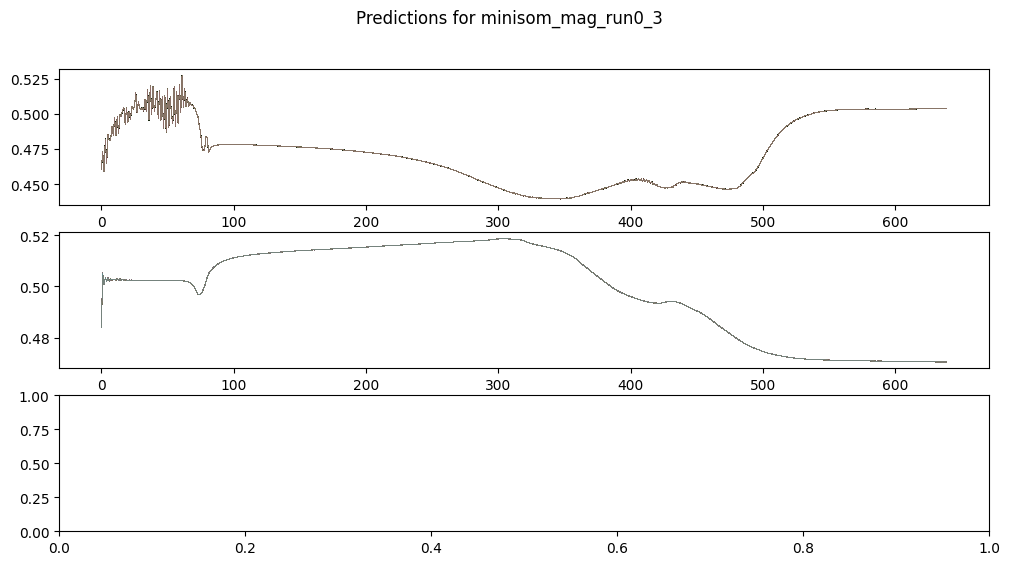

In [56]:

input_data, output_data, _scaler_inputs, scaler_outputs = load_original_data(data_path)
cluster_files = set([f.stem for f in clusters_path.iterdir() if f.is_file()])

# plot best model runs
for _, row in stats_df.loc[top10].iterrows():
    # open cluster file
    with open(clusters_path / f'{row["model"]}.pkl', 'rb') as cf:
        runs = pkl.load(cf)
         
        # get clusters from best run
        for cluster_id, cluster in runs[row['run']]['clusters'].items():
            
            # print(runs[row['run']])
            # print(cluster)
            # get cluster model
            model = keras.models.load_model(
                str(models_path / f'{row["model"]}' / f'{row["model"]}_run{row["run"]}_{cluster_id}.h5')
            )
            
            cluster_inputs, cluster_outputs = join_files_in_cluster(cluster, input_data, output_data)
        
            predictions = model.predict(cluster_inputs)
            
            
            # pred_df = pd.DataFrame(predictions)
            # pred_df.columns = pred_df.columns.astype(str)
            # print(pred_df.columns)
            # predictions = scaler_outputs.inverse_transform(pred_df)
            pred_df = pd.DataFrame(predictions)
            
            print("Ploting results")
            plot_cluster_preds(pred_df, f'{row["model"]}_run{row["run"]}_{cluster_id}')
            # plot predictions vs actuals
            print(predictions.shape, cluster_outputs.shape)
    
